In [ ]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Laden der Daten aus der Output-Datei
with open('output_componentResults.json', 'r') as file:
    data = json.load(file)

# Listen für die Speicherung der Daten
cosine_similarity_scores = []
jaccard_similarity_scores = []
specificity_scores = []
ids = []

# Durchlaufen der Daten und Extrahieren der relevanten Informationen
for item in data:
    # Überprüfen des Namens der Metrik
    if item['metric']['name'] == 'cosineSimilarity':
        cosine_similarity_scores.append(item['metric']['data']['score'])
        # Falls kein Jaccard-Score vorhanden ist, füge einen Platzhalter hinzu
        jaccard_similarity_scores.append(None)
    elif item['metric']['name'] == 'jaccardSimilarity':
        jaccard_similarity_scores.append(item['metric']['data']['score'])
        # Falls kein Cosine-Score vorhanden ist, füge einen Platzhalter hinzu
        cosine_similarity_scores.append(None)
    # Extrahieren der Spezifität der Frage
    specificity_scores.append(item['metric']['testContext']['vars']['quality']['specificity'])
    # Zusammensetzung der IDs
    ids.append(f"{item['metric']['testContext']['vars']['ids']['test']}:{item['metric']['testContext']['vars']['ids']['question']}:{item['metric']['testContext']['vars']['ids']['answer']}")

# Daten in ein DataFrame für Seaborn konvertieren
df = pd.DataFrame({
    'Specificity': specificity_scores,
    'Cosine Similarity Score': cosine_similarity_scores,
    'Jaccard Similarity Score': jaccard_similarity_scores,
    'IDs': ids
})

# Erstellen des Scatterplots mit Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Specificity', y='Cosine Similarity Score', label='Cosine Similarity Score')
sns.scatterplot(data=df, x='Specificity', y='Jaccard Similarity Score', label='Jaccard Similarity Score')

# Hinzufügen der IDs als Textlabels rechts neben den Punkten
for i in range(len(ids)):
    # Überprüfen, ob die Positionswerte endlich sind
    if np.isfinite(df['Specificity'][i]) and np.isfinite(df['Cosine Similarity Score'][i]):
        plt.text(df['Specificity'][i] + 0.01, df['Cosine Similarity Score'][i], df['IDs'][i], fontsize=8, ha='left', va='center')
    if np.isfinite(df['Specificity'][i]) and np.isfinite(df['Jaccard Similarity Score'][i]):
        plt.text(df['Specificity'][i] + 0.01, df['Jaccard Similarity Score'][i], df['IDs'][i], fontsize=8, ha='left', va='center')

plt.xlabel('Specificity')
plt.ylabel('Similarity Score')
plt.title('Scores vs. Specificity')
plt.legend()
plt.grid(True)

# Anzeigen des Plots
plt.show()


In [ ]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Laden der Daten aus der Output-Datei
with open('output_componentResults.json', 'r') as file:
    data = json.load(file)

# Listen für die Speicherung der Daten
models = []
metrics = []
similarity_scores = []

# Dictionary für die Unterkategorien von Quality
quality_subcategories = {}

# Durchlaufen der Daten und Extrahieren der relevanten Informationen
for item in data:
    metric_name = item['metric']['name']
    if metric_name == 'chatGPTScore':
        models.append(item['metric']['model'])
        metrics.append(metric_name)
        similarity_scores.append(item['metric']['data']['score'])
        
        quality_vars = item['metric']['testContext']['vars']['quality']
        for key, value in quality_vars.items():
            if key not in quality_subcategories:
                quality_subcategories[key] = []
            quality_subcategories[key].append(value)

# Erstellen eines DataFrames
df = pd.DataFrame({
    'Model': models,
    'Metric': metrics,
    'Similarity Score': similarity_scores,
    **quality_subcategories  # Entpacken des Dictionarys in separate Spalten
})

# Erstellen einer Figure und Axes
num_subcategories = len(quality_subcategories)
fig, axes = plt.subplots(num_subcategories, 1, figsize=(10, 2 * num_subcategories), sharex=True)

# Durchlaufen der Unterkategorien und Erstellen der Plots
for i, (subcategory, values) in enumerate(quality_subcategories.items()):
    ax = axes[i] if num_subcategories > 1 else axes  # Auswahl der Achse für den Plot
    num_colors = len(set(values))  # Anzahl der einzigartigen Werte in der Unterkategorie
    color_palette = sns.color_palette("RdYlGn", num_colors)
    
    sns.stripplot(ax=ax, data=df, x='Similarity Score', y='Model', hue=subcategory, 
                  dodge=False, jitter=False)
    
    # Gitterlinien hinzufügen
    ax.grid(axis='x', linestyle='--', alpha=0.5)
    
    # Achsenbeschriftungen und Titel hinzufügen
    ax.set_ylabel('Model')
    ax.set_title(f'Cosine Similarity Scores für jedes Modell ({subcategory})')
    
    # Legende anzeigen
    ax.legend(title=subcategory, bbox_to_anchor=(1.02, 1), loc='upper left')

# Achsenbeschriftung für den letzten Plot hinzufügen
ax.set_xlabel('Similarity Score')

# Plotten
plt.tight_layout()
plt.show()


In [ ]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Laden der Daten aus der Output-Datei
with open('output_componentResults.json', 'r') as file:
    data = json.load(file)

# Listen für die Speicherung der Daten
models = []
metrics = []
similarity_scores = []

# Dictionary für die Unterkategorien von Quality
quality_subcategories = {}

# Durchlaufen der Daten und Extrahieren der relevanten Informationen
for item in data:
    metric_name = item['metric']['name']
    if metric_name == 'chatGPTScore':
        models.append(item['metric']['model'])
        metrics.append(metric_name)
        similarity_scores.append(item['metric']['data']['score'])
        
        quality_vars = item['metric']['testContext']['vars']['quality']
        for key, value in quality_vars.items():
            if key not in quality_subcategories:
                quality_subcategories[key] = []
            quality_subcategories[key].append(value)

# Erstellen eines DataFrames
df = pd.DataFrame({
    'Model': models,
    'Metric': metrics,
    'Similarity Score': similarity_scores,
    **quality_subcategories  # Entpacken des Dictionarys in separate Spalten
})

# Iterieren durch die Unterkategorien und Erstellen von Plots
for subcategory, values in quality_subcategories.items():
    # Erstellen eines Catplots mit Boxen für jede Unterkategorie
    sns.catplot(data=df, kind='box', x='Similarity Score', y='Model', col='Metric', col_wrap=1,
                sharex=False, height=4, aspect=2, hue=subcategory, palette='RdYlGn')
    plt.suptitle(f'{subcategory.capitalize()} Quality', y=1.05)  # Titel für den gesamten Plot
    
plt.show()


In [ ]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Laden der Daten aus der Output-Datei
with open('output_componentResults.json', 'r') as file:
    data = json.load(file)

# Listen für die Speicherung der Daten
models = []
metrics = []
similarity_scores = []

# Dictionary für die Unterkategorien von Quality
quality_subcategories = {}

# Durchlaufen der Daten und Extrahieren der relevanten Informationen
for item in data:
    metric_name = item['metric']['name']
    if metric_name == 'cosineSimilarity':
        models.append(item['metric']['model'])
        metrics.append(metric_name)
        similarity_scores.append(item['metric']['data']['score'])
        
        quality_vars = item['metric']['testContext']['vars']['quality']
        for key, value in quality_vars.items():
            if key not in quality_subcategories:
                quality_subcategories[key] = []
            quality_subcategories[key].append(value)

# Erstellen eines DataFrames
df = pd.DataFrame({
    'Model': models,
    'Metric': metrics,
    'Similarity Score': similarity_scores,
    **quality_subcategories  # Entpacken des Dictionarys in separate Spalten
})

# Anpassung der Reihenfolge der Spalten, um die Subkategorien auf der x-Achse anzuordnen
column_order = ['Model', 'Metric', 'Similarity Score'] + list(quality_subcategories.keys())
df = df[column_order]

# Iterieren durch die Modelle und Subkategorien und Erstellen der Plots
num_models = len(df['Model'].unique())
num_subcategories = len(quality_subcategories)

fig, axes = plt.subplots(num_models, num_subcategories, figsize=(15, 15), sharey=True)
fig.suptitle('Cosine Similarity vs. Quality Subcategories', fontsize=16)

for i, model in enumerate(df['Model'].unique()):
    model_df = df[df['Model'] == model]
    for j, subcategory in enumerate(quality_subcategories.keys()):
        sns.boxplot(data=model_df, x=subcategory, y='Similarity Score', ax=axes[i, j], palette='RdYlGn')
        axes[i, j].set_title(f'{model} - {subcategory}')
        axes[i, j].set_xlabel(subcategory)
        axes[i, j].set_ylabel('Similarity Score')

plt.tight_layout()
plt.show()


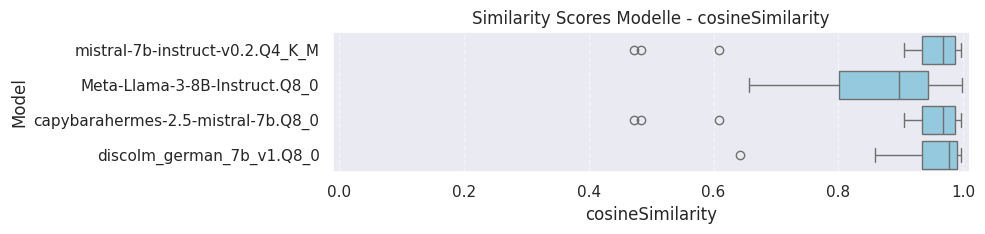

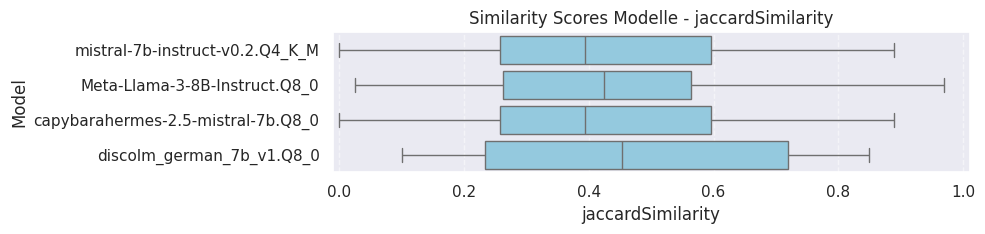

In [2]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Laden der Daten aus der Output-Datei
with open('output_componentResults.json', 'r') as file:
    data = json.load(file)

# Listen für die Speicherung der Daten
models = []
metrics = []
similarity_scores = []

# Dictionary für die Unterkategorien von Quality
quality_subcategories = {}

# Durchlaufen der Daten und Extrahieren der relevanten Informationen
for item in data:
    metric_name = item['metric']['name']
    models.append(item['metric']['model'])
    metrics.append(metric_name)
    similarity_scores.append(item['score'])
    
    quality_vars = item['metric']['testContext']['vars']['quality']
    for key, value in quality_vars.items():
        if key not in quality_subcategories:
            quality_subcategories[key] = []
        quality_subcategories[key].append(value)

# Erstellen eines DataFrames
df = pd.DataFrame({
    'Model': models,
    'Metric': metrics,
    'Similarity Score': similarity_scores,
    **quality_subcategories  # Entpacken des Dictionarys in separate Spalten
})

# Extrahieren aller einzigartigen Metriken
unique_metrics = df['Metric'].unique()

# Setzen des Farbschemas von Seaborn
sns.set_theme()

# Erstellen der Plots für jede Metrik
for metric in unique_metrics:
    # Daten für die aktuelle Metrik filtern
    metric_data = df[df['Metric'] == metric]
    
    # Erstellen des Plots
    plt.figure(figsize=(10, 2.5))
    sns.boxplot(data=metric_data, x='Similarity Score', y='Model', color='skyblue')
    
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    
    plt.xlabel(metric)
    plt.ylabel('Model')

    plt.title(f'Similarity Scores Modelle - {metric}')
    
    plt.xlim(-0.01, 1.01)
    
    # Plotten
    plt.tight_layout()
    plt.show()


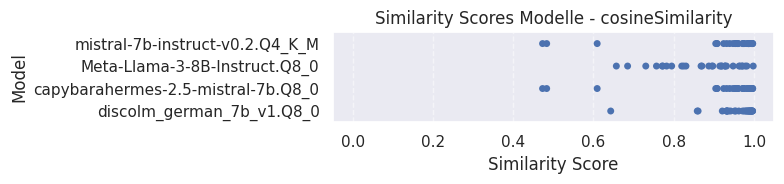

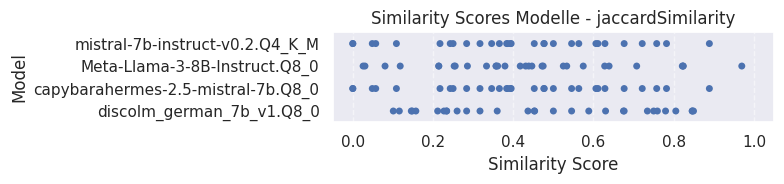

In [1]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Laden der Daten aus der Output-Datei
with open('output_componentResults.json', 'r') as file:
    data = json.load(file)

# Listen für die Speicherung der Daten
models = []
metrics = []
similarity_scores = []

# Dictionary für die Unterkategorien von Quality
quality_subcategories = {}

# Durchlaufen der Daten und Extrahieren der relevanten Informationen
for item in data:
    metric_name = item['metric']['name']
    models.append(item['metric']['model'])
    metrics.append(metric_name)
    similarity_scores.append(item['score'])
    
    quality_vars = item['metric']['testContext']['vars']['quality']
    for key, value in quality_vars.items():
        if key not in quality_subcategories:
            quality_subcategories[key] = []
        quality_subcategories[key].append(value)

# Erstellen eines DataFrames
df = pd.DataFrame({
    'Model': models,
    'Metric': metrics,
    'Similarity Score': similarity_scores,
    **quality_subcategories  # Entpacken des Dictionarys in separate Spalten
})

# Extrahieren aller einzigartigen Metriken
unique_metrics = df['Metric'].unique()

# Setzen des Farbschemas von Seaborn
sns.set_theme()

# Erstellen der Plots für jede Metrik
for metric in unique_metrics:
    # Daten für die aktuelle Metrik filtern
    metric_data = df[df['Metric'] == metric]
    
    # Erstellen des Plots
    plt.figure(figsize=(8, 2))
    sns.stripplot(data=metric_data, x='Similarity Score', y='Model', hue='Metric', dodge=True, jitter=False)
    
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    
    plt.xlabel('Similarity Score')
    plt.ylabel('Model')

    plt.title(f'Similarity Scores Modelle - {metric}')
    
    plt.xlim(-0.05, 1.05)
    
    # Entfernen der Legende
    plt.legend().remove()
    
    # Plotten
    plt.tight_layout()
    plt.show()


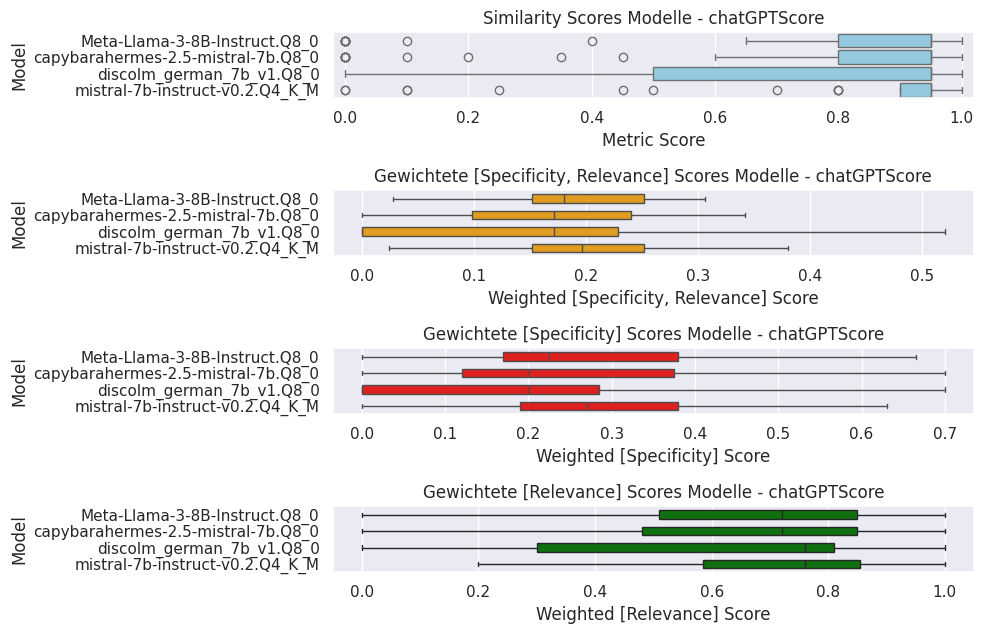

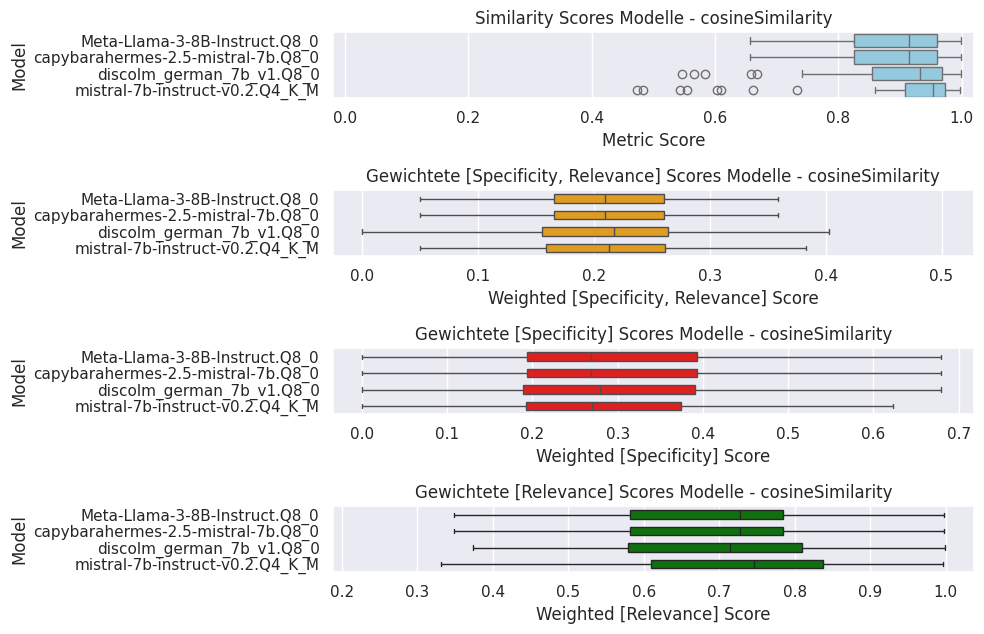

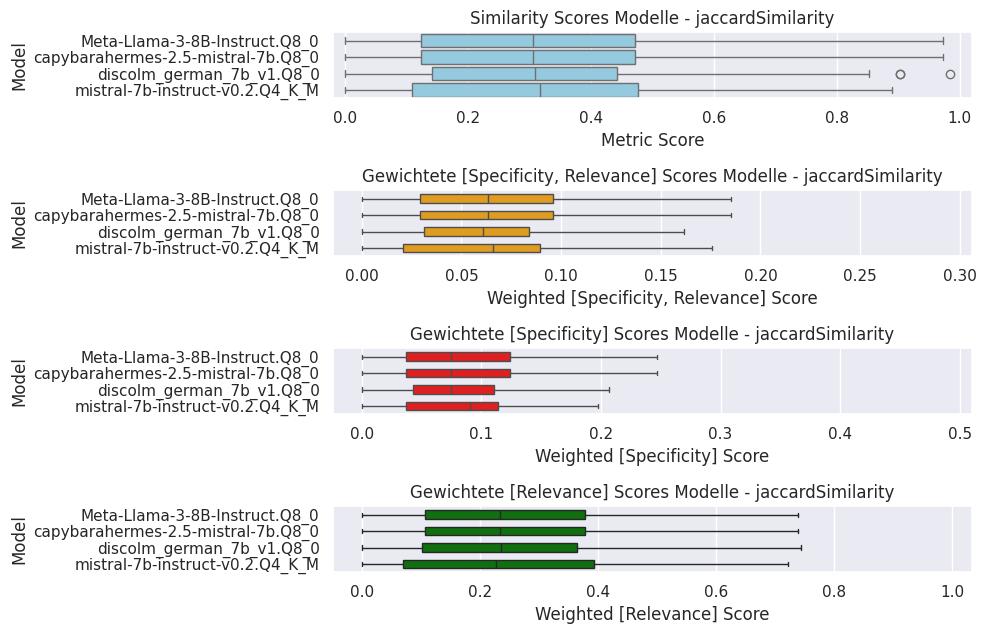

In [1]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Laden der Daten aus der Output-Datei
with open('output_componentResults copy.json', 'r') as file:
    data = json.load(file)

# Listen für die Speicherung der Daten
models = []
metrics = []
similarity_scores = []
specificities = []  # Neue Liste für die Speicherung der Specificity
relevance_scores = []  # Neue Liste für die Speicherung der Relevance Score

# Durchlaufen der Daten und Extrahieren der relevanten Informationen
for item in data:
    metric_name = item['metric']['name']
    models.append(item['metric']['model'])
    metrics.append(metric_name)
    similarity_scores.append(item['score'])
    specificities.append(item['metric']['testContext']['vars']['quality']['specificity'])  # Specificity hinzufügen
    relevance_scores.append(item['metric']['testContext']['vars']['quality']['relevance'])  # Relevance hinzufügen1

# Erstellen eines DataFrames
df = pd.DataFrame({
    'Model': models,
    'Metric': metrics,
    'Similarity Score': similarity_scores,
    'Specificity': specificities,  # Specificity Spalte hinzufügen
    'Relevance': relevance_scores  # Relevance Spalte hinzufügen
})

# Sortieren des DataFrame nach Modellnamen
df = df.sort_values(by='Model')

# Extrahieren aller einzigartigen Modellnamen und alphabetisch sortieren
unique_models = sorted(df['Model'].unique())

# Extrahieren aller einzigartigen Metriken
unique_metrics = df['Metric'].unique()

sns.set_theme()

for metric in unique_metrics:

    metric_data = df[df['Metric'] == metric]
    
    plt.figure(figsize=(10, 6.5))
    
    plt.subplot(4, 1, 1)
    sns.boxplot(data=metric_data, x='Similarity Score', y='Model', color='skyblue', order=unique_models)
    plt.xlabel('Metric Score')
    plt.title(f'Similarity Scores Modelle - {metric}')
    plt.xlim(-0.02, 1.02)  

    plt.subplot(4, 1, 2)
    weighted_specificities = metric_data['Similarity Score'] * (1-metric_data['Specificity']) * metric_data['Relevance']
    sns.boxplot(x=weighted_specificities, y=metric_data['Model'], color='orange', width=0.5, fliersize=0, order=unique_models)
    plt.xlabel('Weighted [Specificity, Relevance] Score')
    plt.title(f'Gewichtete [Specificity, Relevance] Scores Modelle - {metric}')
    #plt.xlim(-0.02, 1.02) 
    
    plt.subplot(4, 1, 3)
    weighted_specificities = metric_data['Similarity Score'] * (1-metric_data['Specificity'])
    sns.boxplot(x=weighted_specificities, y=metric_data['Model'], color='red', width=0.5, fliersize=0, order=unique_models)
    plt.xlabel('Weighted [Specificity] Score')
    plt.title(f'Gewichtete [Specificity] Scores Modelle - {metric}')
    #plt.xlim(-0.02, 1.02) 

    plt.subplot(4, 1, 4)
    weighted_relevances = metric_data['Similarity Score'] * metric_data['Relevance']
    sns.boxplot(x=weighted_relevances, y=metric_data['Model'], color='green', width=0.5, fliersize=0, order=unique_models)
    plt.xlabel('Weighted [Relevance] Score')
    plt.title(f'Gewichtete [Relevance] Scores Modelle - {metric}')
    #plt.xlim(-0.02, 1.02)  
    
    plt.subplots_adjust(hspace=100)

    # Plotten
    plt.tight_layout()
    plt.show()


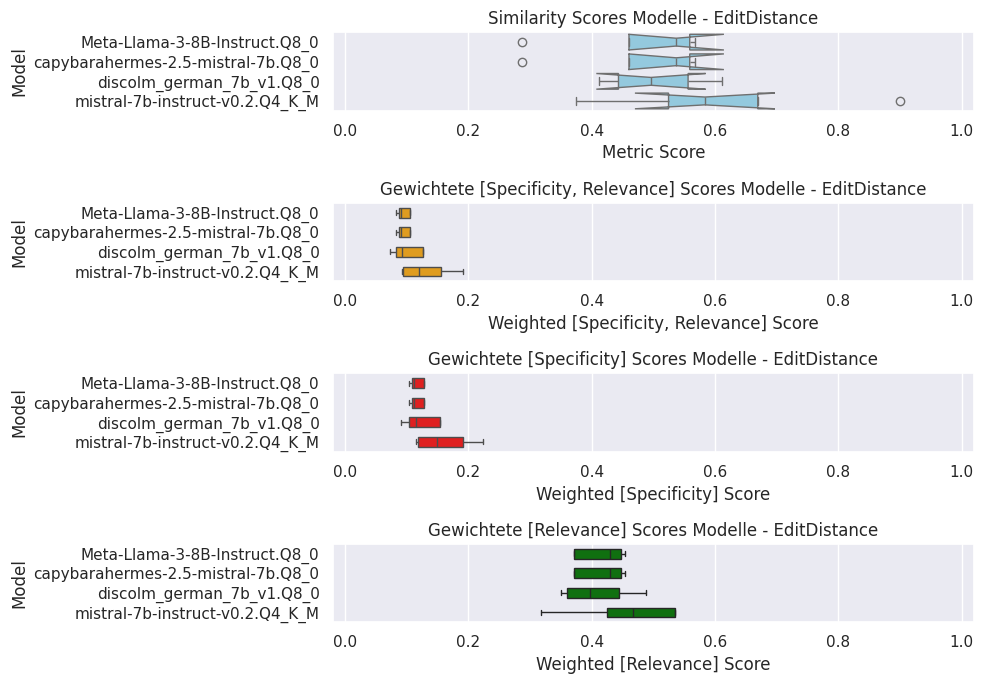

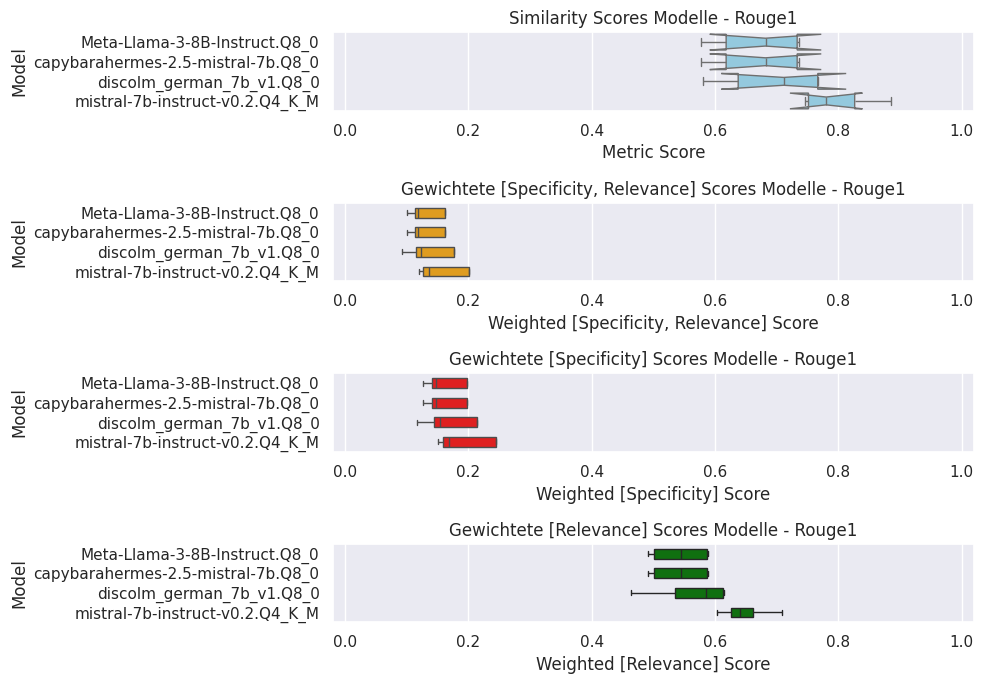

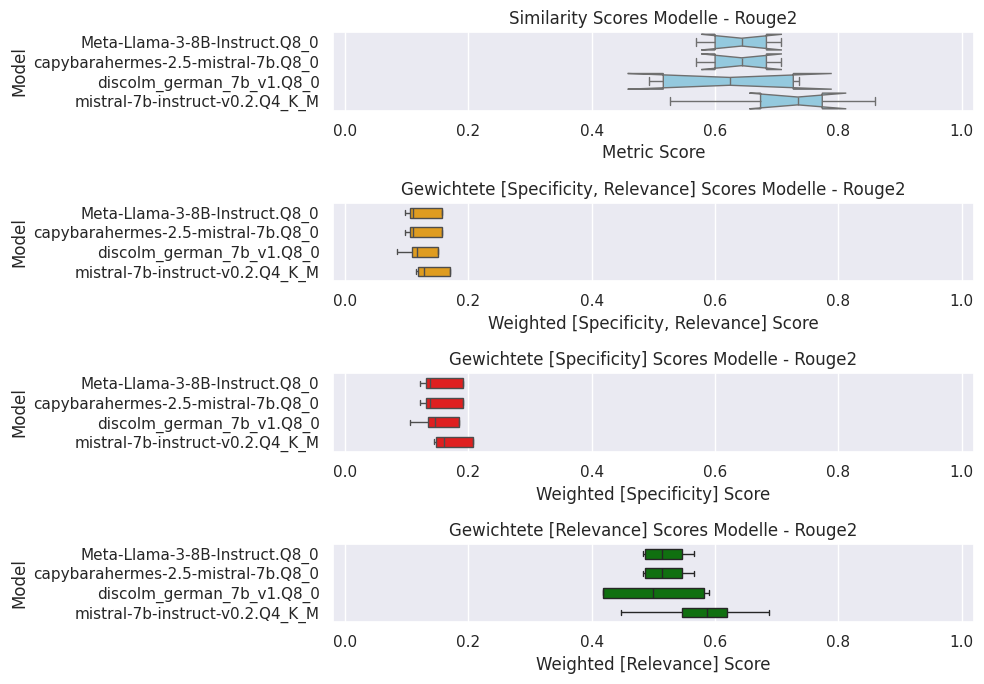

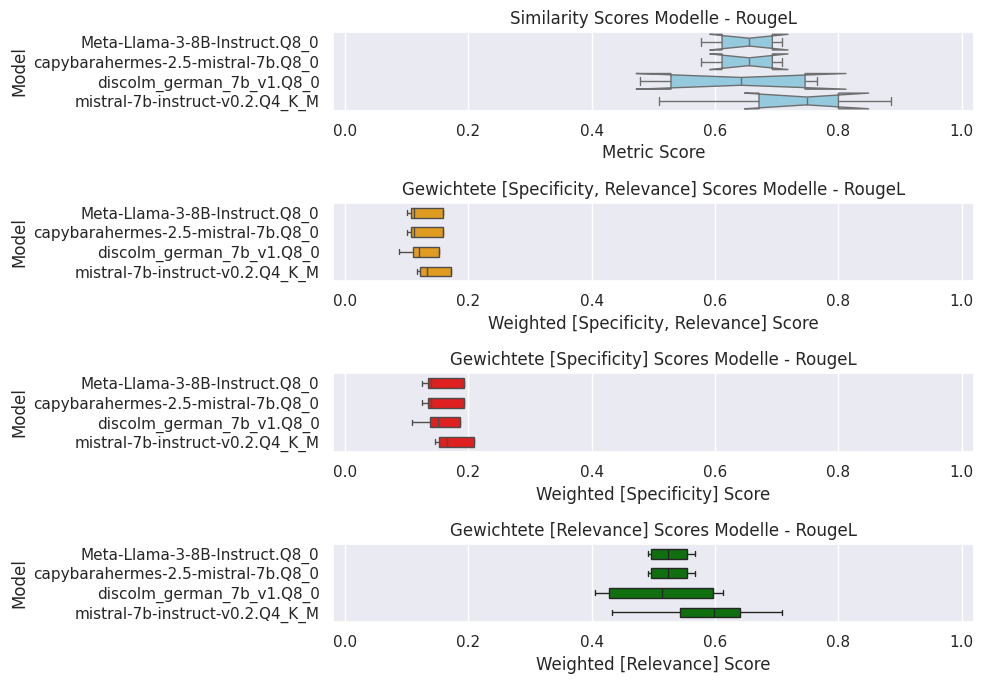

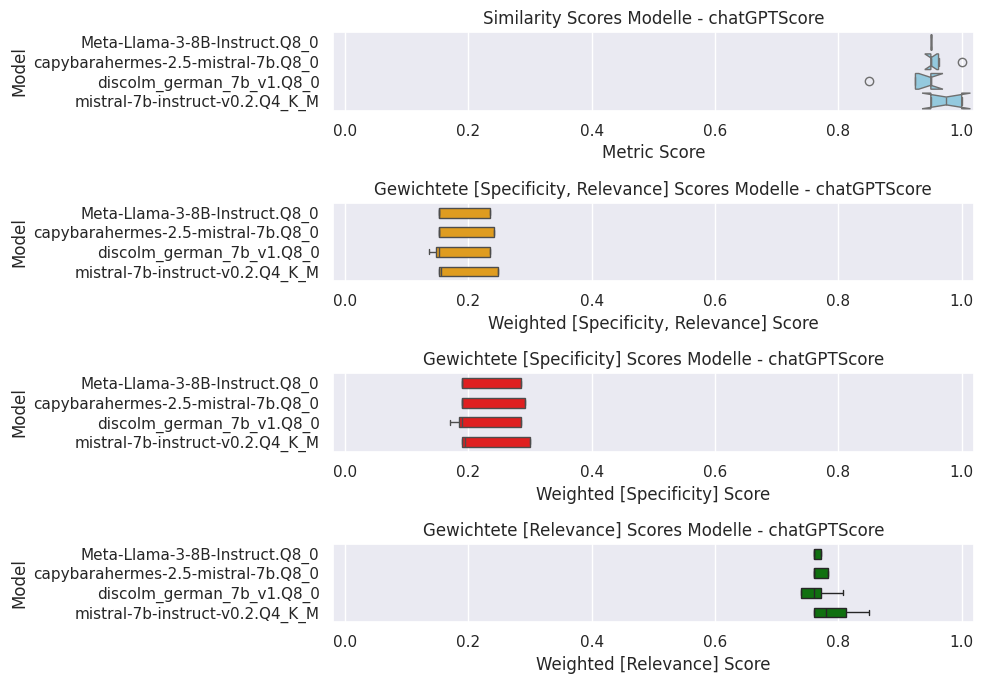

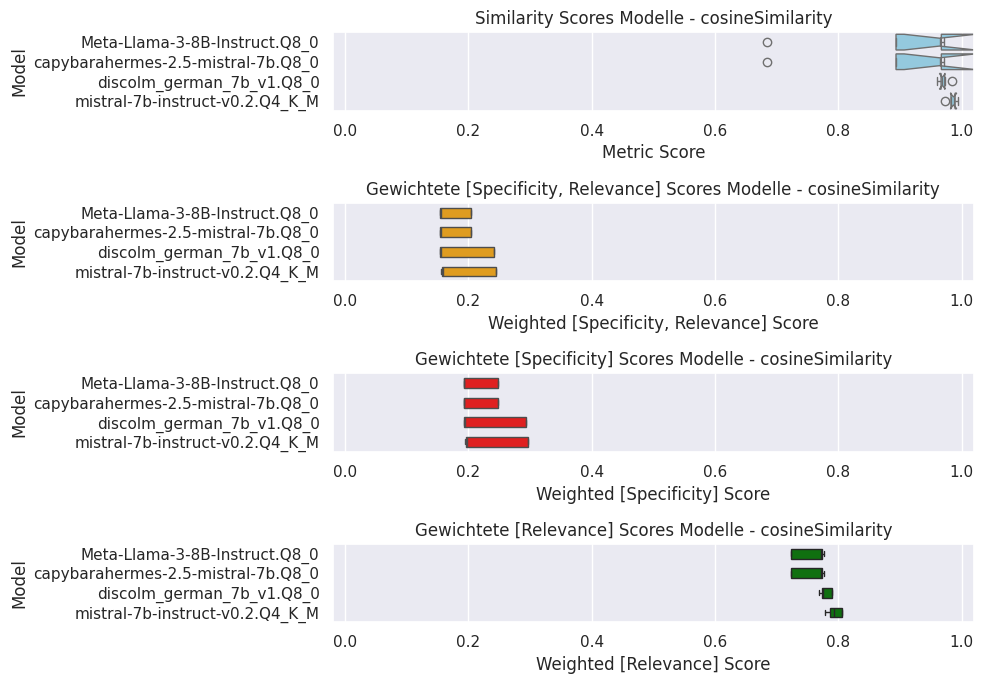

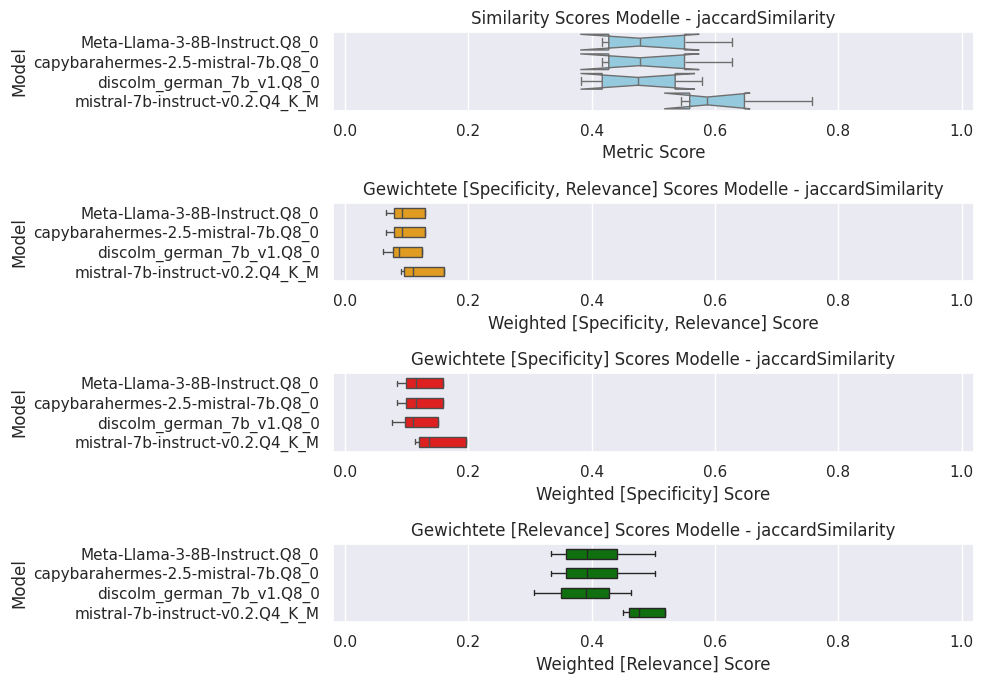

In [2]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Laden der Daten aus der Output-Datei
with open('output_componentResults.json', 'r') as file:
    data = json.load(file)

# Listen für die Speicherung der Daten
models = []
metrics = []
similarity_scores = []
specificities = []  # Neue Liste für die Speicherung der Specificity
relevance_scores = []  # Neue Liste für die Speicherung der Relevance Score

# Durchlaufen der Daten und Extrahieren der relevanten Informationen
for item in data:
    metric_name = item['metric']['name']
    models.append(item['metric']['model'])
    metrics.append(metric_name)
    similarity_scores.append(item['score'])
    specificities.append(item['metric']['testContext']['vars']['quality']['specificity'])  # Specificity hinzufügen
    relevance_scores.append(item['metric']['testContext']['vars']['quality']['relevance'])  # Relevance hinzufügen1

# Erstellen eines DataFrames
df = pd.DataFrame({
    'Model': models,
    'Metric': metrics,
    'Similarity Score': similarity_scores,
    'Specificity': specificities,  # Specificity Spalte hinzufügen
    'Relevance': relevance_scores  # Relevance Spalte hinzufügen
})

# Sortieren des DataFrame nach Modellnamen
df = df.sort_values(by='Model')

# Extrahieren aller einzigartigen Modellnamen und alphabetisch sortieren
unique_models = sorted(df['Model'].unique())

# Extrahieren aller einzigartigen Metriken
unique_metrics = sorted(df['Metric'].unique())

sns.set_theme()

for metric in unique_metrics:

    metric_data = df[df['Metric'] == metric]
    
    plt.figure(figsize=(10, 7))
    
    plt.subplot(4, 1, 1)
    sns.boxplot(data=metric_data, x='Similarity Score', y='Model', color='skyblue', order=unique_models, notch=True)
    plt.xlabel('Metric Score')
    plt.title(f'Similarity Scores Modelle - {metric}')
    plt.xlim(-0.02, 1.02)  

    plt.subplot(4, 1, 2)
    weighted_specificities = metric_data['Similarity Score'] * (1-metric_data['Specificity']) * metric_data['Relevance']
    sns.boxplot(x=weighted_specificities, y=metric_data['Model'], color='orange', width=0.5, fliersize=0, order=unique_models, notch=True)
    plt.xlabel('Weighted [Specificity, Relevance] Score')
    plt.title(f'Gewichtete [Specificity, Relevance] Scores Modelle - {metric}')
    plt.xlim(-0.02, 1.02) 
    
    plt.subplot(4, 1, 3)
    weighted_specificities = metric_data['Similarity Score'] * (1-metric_data['Specificity'])
    sns.boxplot(x=weighted_specificities, y=metric_data['Model'], color='red', width=0.5, fliersize=0, order=unique_models)
    plt.xlabel('Weighted [Specificity] Score')
    plt.title(f'Gewichtete [Specificity] Scores Modelle - {metric}')
    plt.xlim(-0.02, 1.02) 

    plt.subplot(4, 1, 4)
    weighted_relevances = metric_data['Similarity Score'] * metric_data['Relevance']
    sns.boxplot(x=weighted_relevances, y=metric_data['Model'], color='green', width=0.5, fliersize=0, order=unique_models)
    plt.xlabel('Weighted [Relevance] Score')
    plt.title(f'Gewichtete [Relevance] Scores Modelle - {metric}')
    plt.xlim(-0.02, 1.02)  
    
    plt.subplots_adjust(hspace=100)

    # Plotten
    plt.tight_layout()
    plt.show()


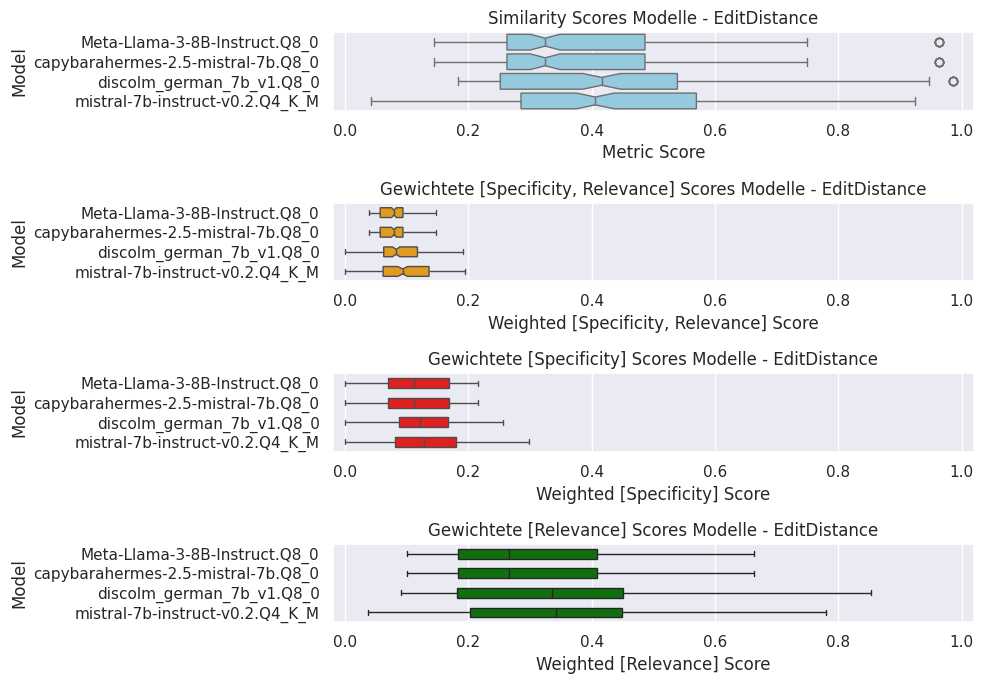

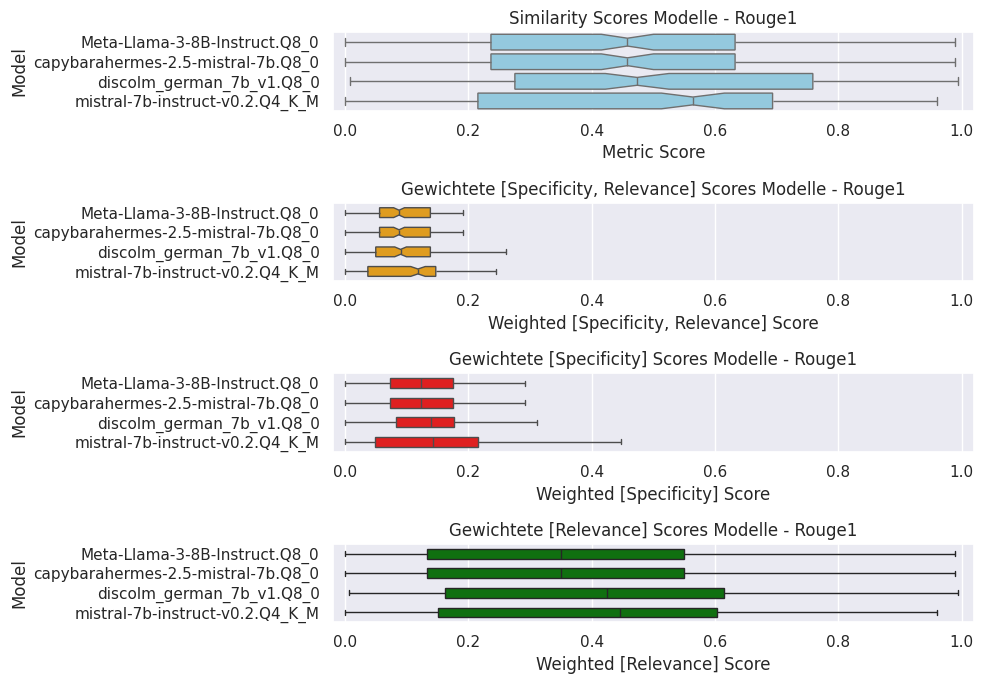

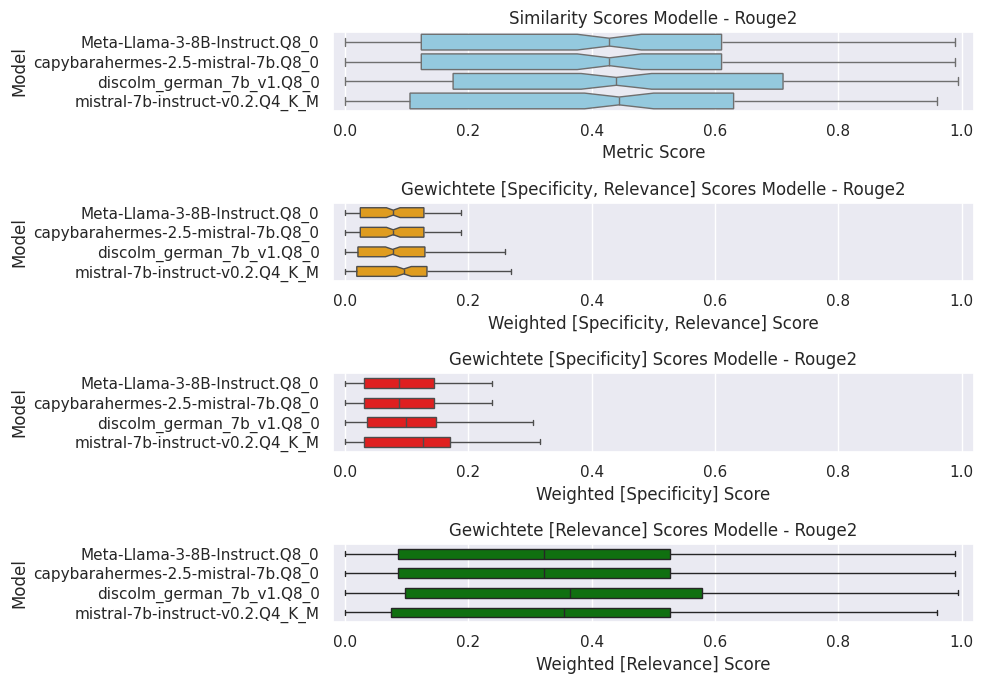

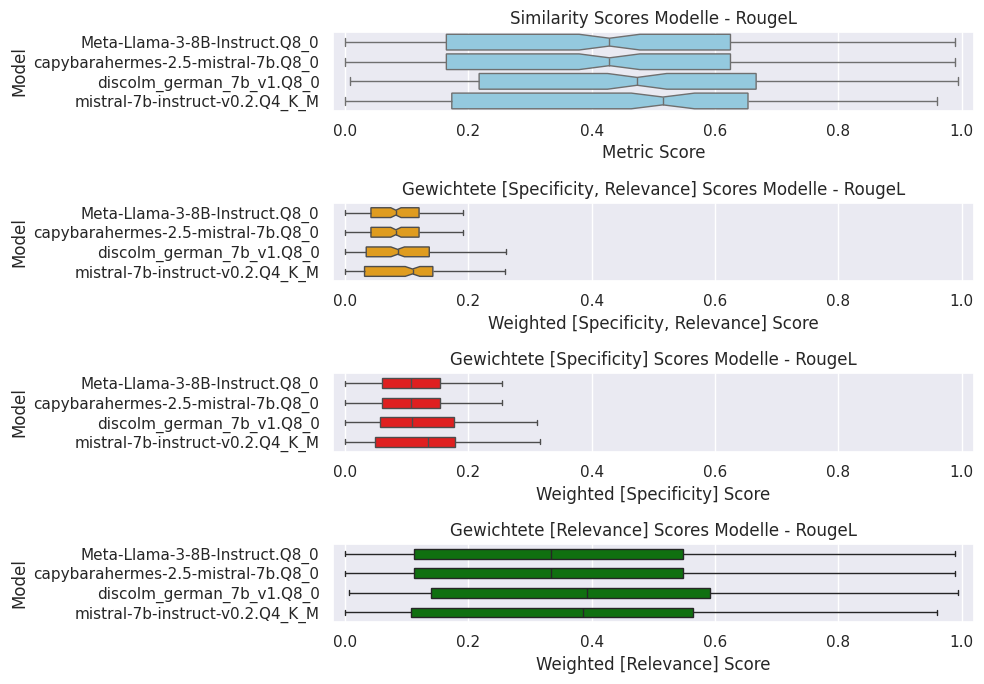

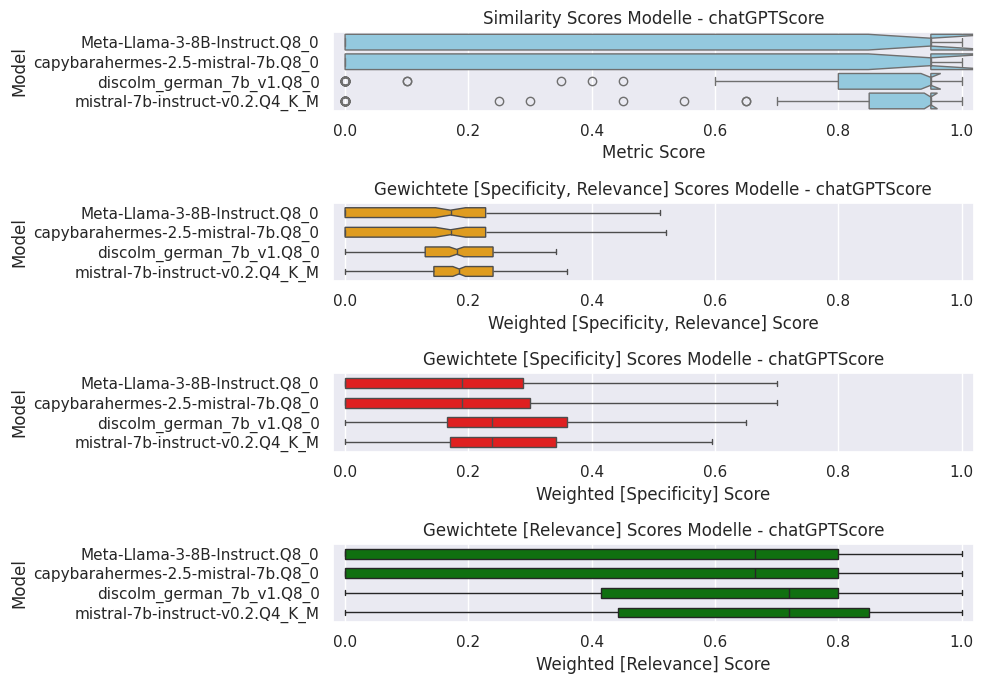

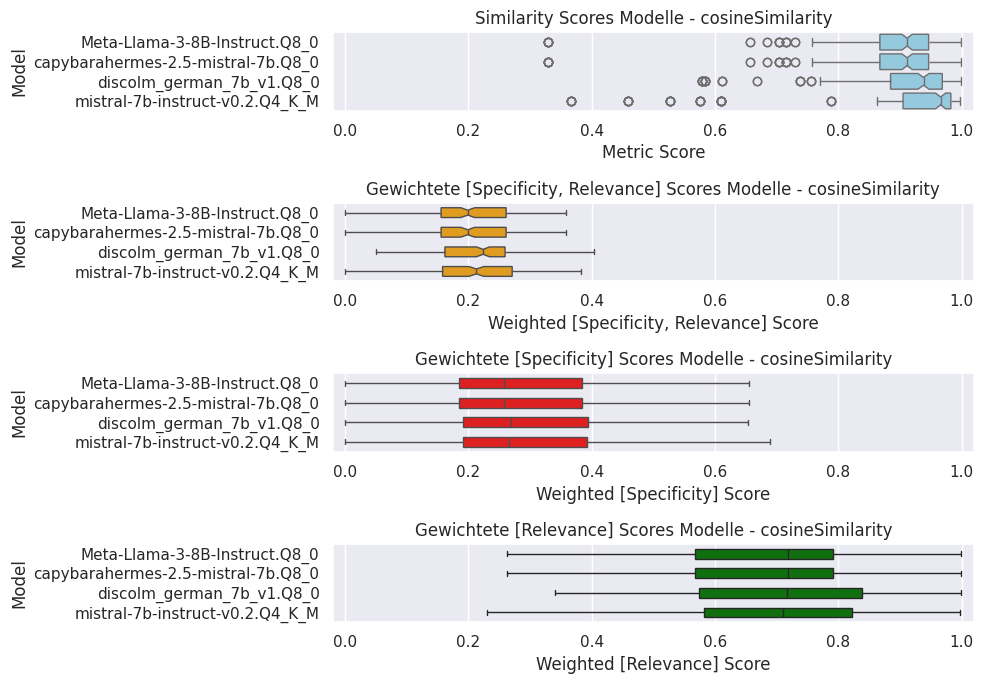

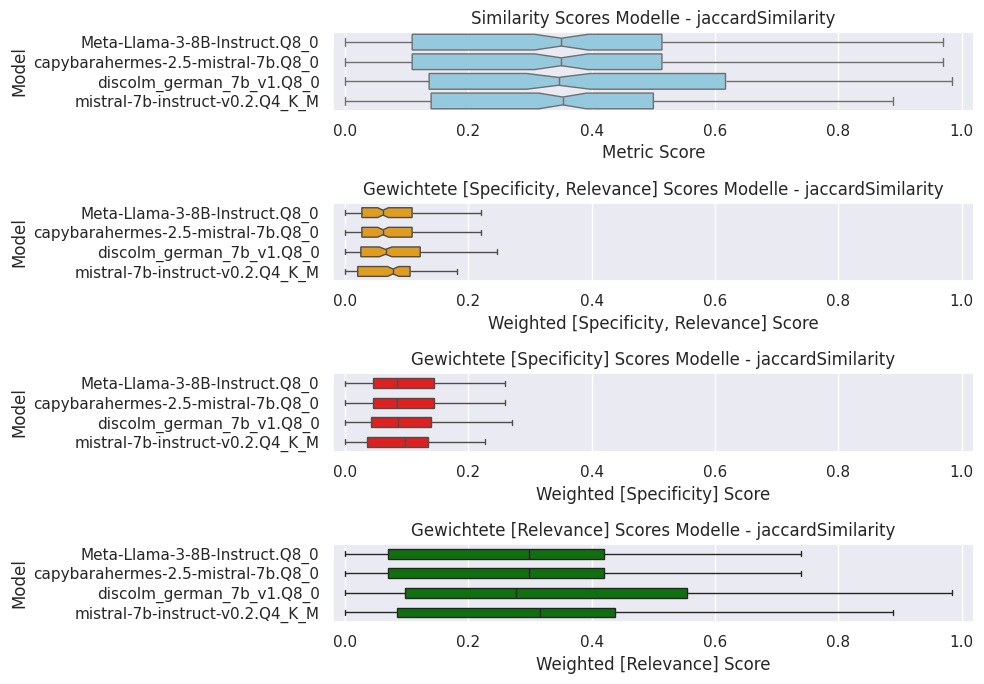

In [1]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Laden der Daten aus der Output-Datei
with open('output_componentResults.json', 'r') as file:
    data = json.load(file)

# Listen für die Speicherung der Daten
models = []
metrics = []
similarity_scores = []
specificities = []  # Neue Liste für die Speicherung der Specificity
relevance_scores = []  # Neue Liste für die Speicherung der Relevance Score

# Durchlaufen der Daten und Extrahieren der relevanten Informationen
for item in data:
    metric_name = item['metric']['name']
    models.append(item['metric']['model'])
    metrics.append(metric_name)
    similarity_scores.append(item['score'])
    specificities.append(item['metric']['testContext']['vars']['quality']['specificity'])  # Specificity hinzufügen
    relevance_scores.append(item['metric']['testContext']['vars']['quality']['relevance'])  # Relevance hinzufügen1

# Erstellen eines DataFrames
df = pd.DataFrame({
    'Model': models,
    'Metric': metrics,
    'Similarity Score': similarity_scores,
    'Specificity': specificities,  # Specificity Spalte hinzufügen
    'Relevance': relevance_scores  # Relevance Spalte hinzufügen
})

# Sortieren des DataFrame nach Modellnamen
df = df.sort_values(by='Model')

# Extrahieren aller einzigartigen Modellnamen und alphabetisch sortieren
unique_models = sorted(df['Model'].unique())

# Extrahieren aller einzigartigen Metriken
unique_metrics = sorted(df['Metric'].unique())

sns.set_theme()

for metric in unique_metrics:

    metric_data = df[df['Metric'] == metric]
    
    plt.figure(figsize=(10, 7))
    
    plt.subplot(4, 1, 1)
    sns.boxplot(data=metric_data, x='Similarity Score', y='Model', color='skyblue', order=unique_models, notch=True)
    plt.xlabel('Metric Score')
    plt.title(f'Similarity Scores Modelle - {metric}')
    plt.xlim(-0.02, 1.02)  

    plt.subplot(4, 1, 2)
    weighted_specificities = metric_data['Similarity Score'] * (1-metric_data['Specificity']) * metric_data['Relevance']
    sns.boxplot(x=weighted_specificities, y=metric_data['Model'], color='orange', width=0.5, fliersize=0, order=unique_models, notch=True)
    plt.xlabel('Weighted [Specificity, Relevance] Score')
    plt.title(f'Gewichtete [Specificity, Relevance] Scores Modelle - {metric}')
    plt.xlim(-0.02, 1.02) 
    
    plt.subplot(4, 1, 3)
    weighted_specificities = metric_data['Similarity Score'] * (1-metric_data['Specificity'])
    sns.boxplot(x=weighted_specificities, y=metric_data['Model'], color='red', width=0.5, fliersize=0, order=unique_models)
    plt.xlabel('Weighted [Specificity] Score')
    plt.title(f'Gewichtete [Specificity] Scores Modelle - {metric}')
    plt.xlim(-0.02, 1.02) 

    plt.subplot(4, 1, 4)
    weighted_relevances = metric_data['Similarity Score'] * metric_data['Relevance']
    sns.boxplot(x=weighted_relevances, y=metric_data['Model'], color='green', width=0.5, fliersize=0, order=unique_models)
    plt.xlabel('Weighted [Relevance] Score')
    plt.title(f'Gewichtete [Relevance] Scores Modelle - {metric}')
    plt.xlim(-0.02, 1.02)  
    
    plt.subplots_adjust(hspace=100)

    # Plotten
    plt.tight_layout()
    plt.show()
